In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import material
import cross_section
import beam_element
import structure
import solver

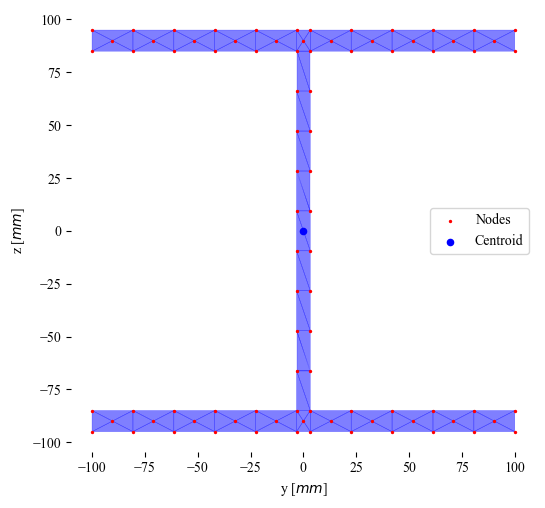

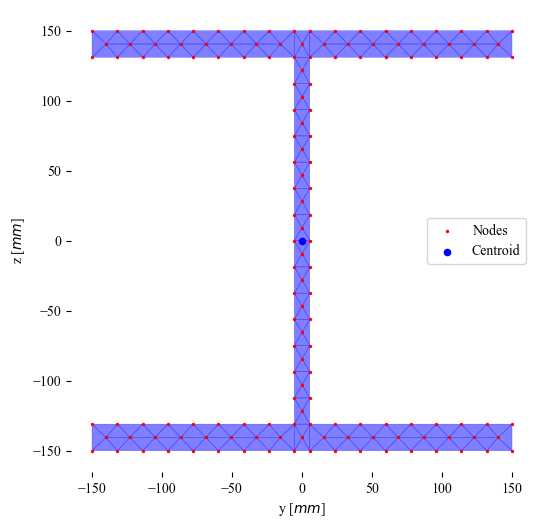

In [2]:
HEA_200 = H_beam(web_width     =   6.5,
                 web_height    = 170.0,
                 flange_width  = 200.0,
                 flange_height =  10.0)
beam = Mesh(HEA_200, mesh_type="triangle", mesh_size=20)
beam.plot()

HEB_300 = H_beam(web_width     =  11.0,
                 web_height    = 262.0,
                 flange_width  = 300.0,
                 flange_height =  19.0)
column = Mesh(HEB_300, mesh_type="triangle", mesh_size=20)
column.plot()


In [3]:
load_DOFs   = [6 * 2   ]
nodal_loads = [100000.0]

struc = structure.Frame(column            = column, 
						beam              = beam, 
						number_of_stories = 1, 
						story_height      = 3000, 
						story_width       = 7000, 
						load_DOFs         = load_DOFs,
						nodal_loads       = nodal_loads,
						number_of_sections_per_elemnt = 10)

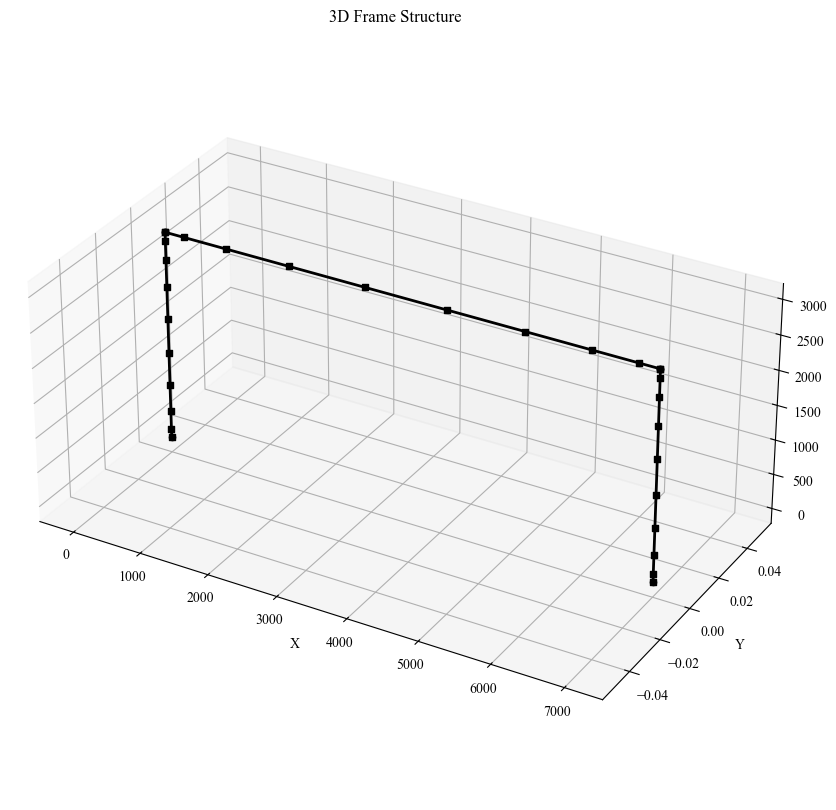

In [4]:
lin_solver = solver.Linear(struc)
lin_solver.plot_initial_structure()

--------------------------------------
Node 0
          Displacement
u [mm]        0.000000
v [mm]        0.000000
w [mm]        0.000000
θx [rad]      0.000000
θy [rad]      0.000000
θz [rad]      0.000000
          Internal Force
Fx [kN]       -50.984383
Fy [kN]        -0.000000
Fz [kN]        -5.818185
Mx [kNm]        0.000000
My [kNm]     -132.426253
Mz [kNm]        0.000000
--------------------------------------
Node 1
          Displacement
u [mm]        0.000000
v [mm]        0.000000
w [mm]        0.000000
θx [rad]      0.000000
θy [rad]      0.000000
θz [rad]      0.000000
          Internal Force
Fx [kN]       -49.015617
Fy [kN]         0.000000
Fz [kN]         5.818185
Mx [kNm]       -0.000000
My [kNm]     -126.846450
Mz [kNm]        0.000000
--------------------------------------
Node 2
          Displacement
u [mm]        7.218273
v [mm]        0.000000
w [mm]        0.005820
θx [rad]     -0.000000
θy [rad]      0.003306
θz [rad]      0.000001
          Internal Force
Fx [

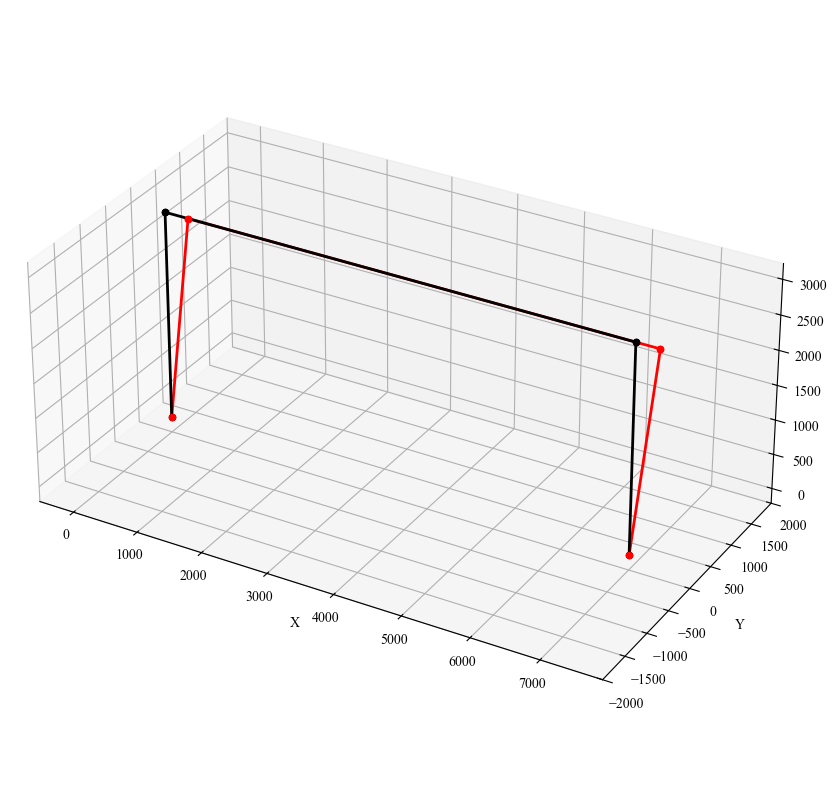

In [5]:
lin_solver.solve()
lin_solver.plot_displaced_structure(scale=50.0)